Support Vector Machine

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
load_data = datasets.load_breast_cancer()

In [3]:
load_data.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [4]:
myDataframe = pd.DataFrame(np.c_[load_data['data'], load_data['target']], columns = np.append(load_data['feature_names'], ['target']))

In [5]:
myDataframe.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


In [6]:
myDataframe.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
target                     0
dtype: int64

In [7]:
X = myDataframe[['mean texture', 'symmetry error']]

In [8]:
y = myDataframe['target']

In [9]:
import seaborn as sns

<AxesSubplot:xlabel='mean texture', ylabel='symmetry error'>

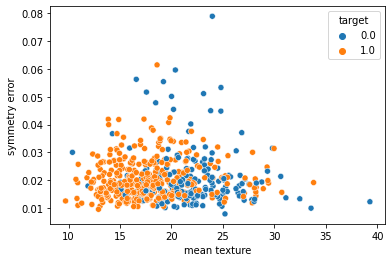

In [10]:
sns.scatterplot(x = 'mean texture', y = 'symmetry error', hue = 'target', data = myDataframe)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [12]:
print('training set contains {} samples, test set contains {} samples'.format(X_train.shape[0], X_test.shape[0]))

training set contains 398 samples, test set contains 171 samples


In [13]:
np.unique(y_test)

array([0., 1.])

In [14]:
markers = ('x', 's')

In [15]:
colors = ('red', 'green')

In [16]:
myColourMap = ListedColormap(colors[:len(np.unique(y_test))])

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


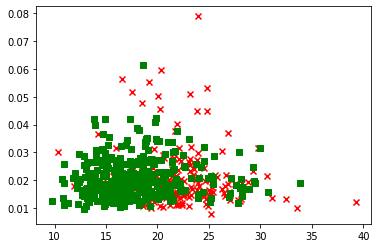

In [17]:
for id, cl in enumerate(np.unique(y)):
  plt.scatter(x = X[y == cl]['mean texture'], y = X[y == cl]['symmetry error'], c = myColourMap(id), marker=markers[id], label = cl)

In [18]:
standardScaler = StandardScaler()

In [19]:
standardScaler.fit(X_train)

StandardScaler()

In [20]:
X_train_standard = standardScaler.transform(X_train)

In [21]:
X_test_standard = standardScaler.transform(X_test)

In [22]:
SVM = SVC(kernel = 'linear', random_state = 0, gamma = 1, C = 10.0)
SVM.fit(X_train_standard, y_train)

SVC(C=10.0, gamma=1, kernel='linear', random_state=0)

In [23]:
y_pred = SVM.predict(X_test_standard)

In [24]:
print('accuracy: ', metrics.accuracy_score(y_test, y_pred))

accuracy:  0.6900584795321637


In [25]:
print(metrics.confusion_matrix(y_test, y_pred))

[[29 40]
 [13 89]]


In [26]:
print("precision: ",metrics.precision_score(y_test, y_pred))
print("recall: ",metrics.recall_score(y_test, y_pred))

precision:  0.689922480620155
recall:  0.8725490196078431


In [27]:
X.columns = [0, 1]

In [28]:
X.head()

,0,1
0,10.38,0.03003
1,17.77,0.01389
2,21.25,0.02250
3,20.38,0.05963
4,14.34,0.01756


In [29]:
X[y == 1][0]

19     14.36
20     15.71
21     12.44
37     18.42
46     16.84
       ...  
558    22.68
559    23.93
560    27.15
561    29.37
568    24.54
Name: 0, Length: 357, dtype: float64

In [30]:
def myVersionTuple(version):
  return tuple(map(int, (version.split("."))))

def myDecisionPlot(X, y, classifier, test_id = None, resolution = 0.03):
  markers = ('s', 'x', 'o')
  colours = ('red', 'green', 'blue')
  myColourMap = ListedColormap(colors[:len(np.unique(y))])
  x1Min, x1Max = X[:, 0].min() - 1, X[:, 0].max() + 1
  x2Min, x2Max = X[:, 0].min() - 1, X[:, 0].max() + 1
  xx1, xx2 = np.meshgrid(np.arrange(x1Min, x1Max, resolution), np.arrange(x2Min, x2Max, resolution))
  Z = classifier.predict(np.array([xx1, ravel(), xx2.ravel()]).T)
  Z = Z.reshape(xx1.shape)
  plt.contourf(xx1, xx2, Z, alpha=0.4, myColourMap = myColourMap)
  plt.xlim(xx1.min(), xx1.max())
  plt.ylim(xx2.min(), xx2.max())

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


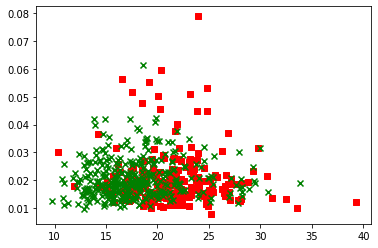

In [31]:
markers = ('s', 'x', 'o')
colours = ('red', 'green', 'blue')
myColourMap = ListedColormap(colors[:len(np.unique(y_test))])

for id, cl in enumerate(np.unique(y)):
  plt.scatter(x = X[y == cl][0], y = X[y == cl][1], c = myColourMap(id), marker = markers[id], label = cl)